In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## Data Understanding

In [2]:
# Reading the data
bike = pd.read_csv("day.csv")
# Viewing the first 5 rows to see how the data looks like
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
# Checking any missing values
c = bike.isnull().sum()
print(c)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### It has been observed that there are no missing values in the dataset

In [5]:
# Checking summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking Datatype of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Renaming few columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

#### Dropping columns not required for modelling
- Instant: Indicates row number, not required
- Casual and Registered: As our dependent variable is a count
- The columns ‘dteday’ and ‘yr month’ contain the same data. To avoid confusion, we can drop the ‘dteday’ column.

In [8]:
bike.drop(columns=["instant","casual","registered","dteday"],inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Checking Correlation between numerical variables
bike[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### When the correlation between two features is close to 1 (or -1), it indicates high similarity, and dropping one of the highly correlated features is advisable.
- Hence dropping atemp column too.

In [10]:
# Dropping atemp column from the dataset 
bike.drop(columns=["atemp"], inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [11]:
# Converting variables like season, month, weathersit, weekday into categorical string values
bike['season'] = bike.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## EDA

#### Visualizing the numerical variables to see which variables are most correlated to the target variable 'count'.

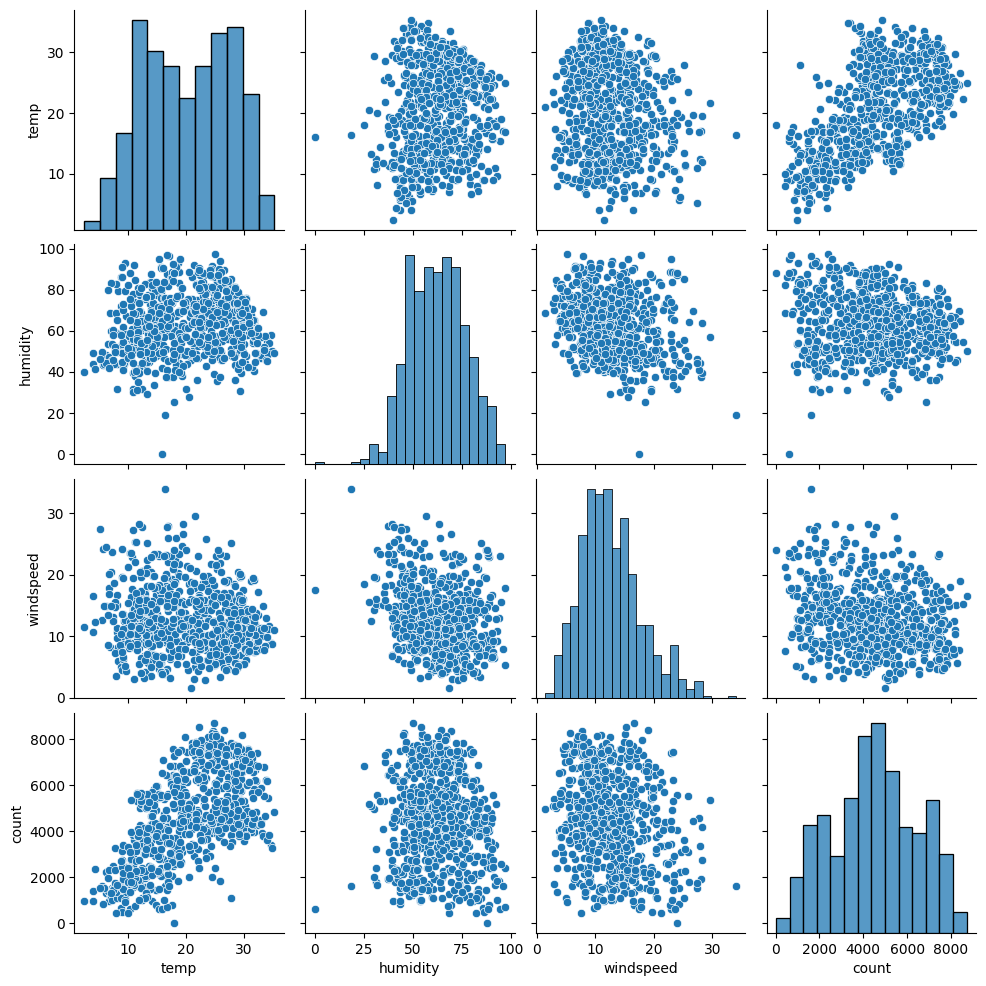

In [12]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'windspeed','count'])
plt.show()

#### From the above pair plots, we can observe that there are some independent variables look positively correlated to the 'count' variable. Bike rentals are more correlated to temperature

#### Visualizing the categorical variables to see which variables are most correlated to the target variable 'count'.

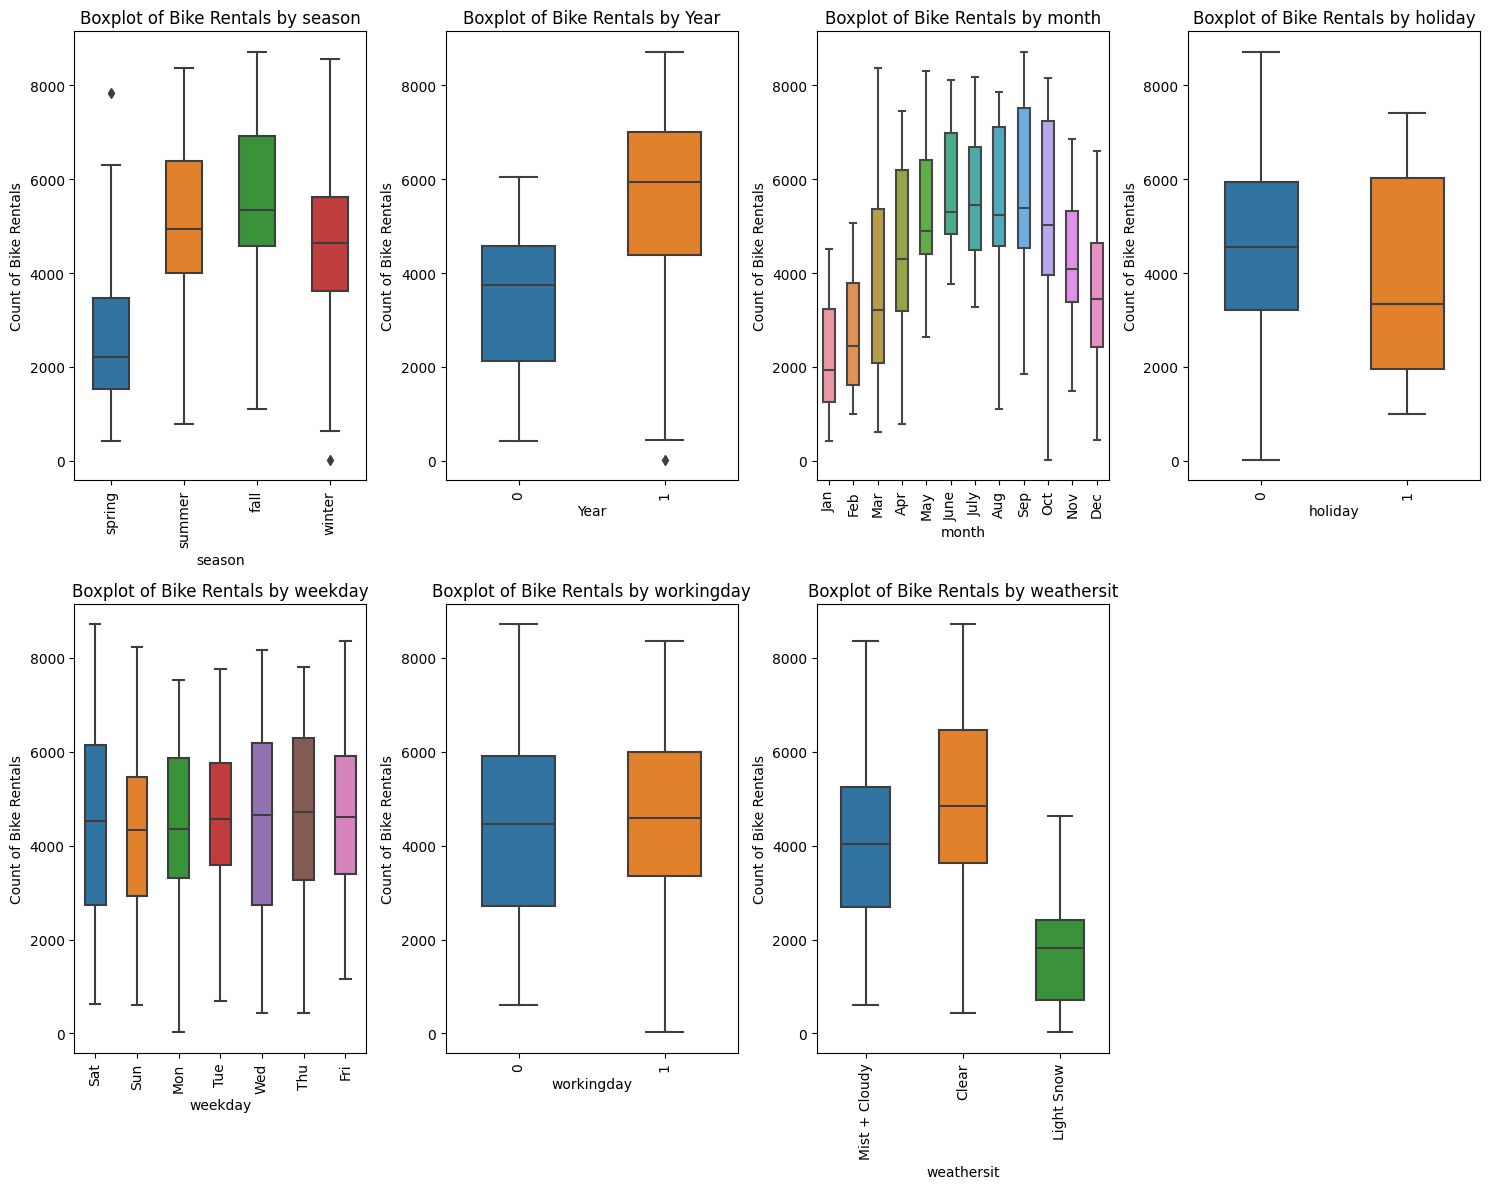

In [13]:
cat_vars = ['season', 'Year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_var, y='count', data=bike, width=0.5)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### From the above box plots, below are some observations.
- Bike Rentals are more during the Fall season and then in summer.
- Bike Rentals are more in the year 2019 compared to 2018.
- September tops the monthly rental count, with surrounding months showing substantial demand. 
The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.
- Bike Rentals are more in partly cloudy weather.
- Bike Rentals are more on Saturday,Wednesday and Thursday
- Holidays generally result in lower rental counts compared to working days. 
Holidays exhibit greater variability in rental demand..

#### Understanding Correlation among categorical and numerical values

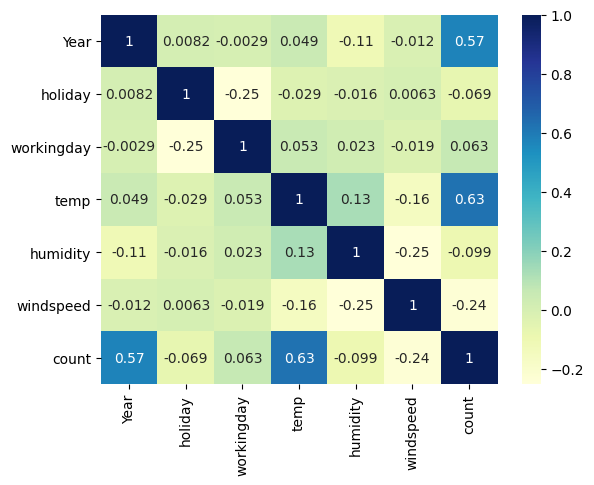

In [14]:
# Checking correlation
#plt.figure(figsize=(25, 12))
sns.heatmap(bike[['Year','holiday','workingday','temp','humidity','windspeed','count']].corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Highest correlation with count is seen in temp followed by Year.

## Data Preparation

In [15]:
# Create dummy variables using pd.get_dummies for month, season, weathersit, weekday and let's drop the first column from  using 'drop_first = True'

months=pd.get_dummies(bike.month,drop_first=True, dtype='int')
weekdays=pd.get_dummies(bike.weekday,drop_first=True, dtype='int')
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True, dtype='int')
seasons=pd.get_dummies(bike.season,drop_first=True, dtype='int')


In [16]:
# Adding indicator variable columns to the dataset . Dropping original columns
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [17]:
# Number of rows and columns
bike.shape

(730, 29)

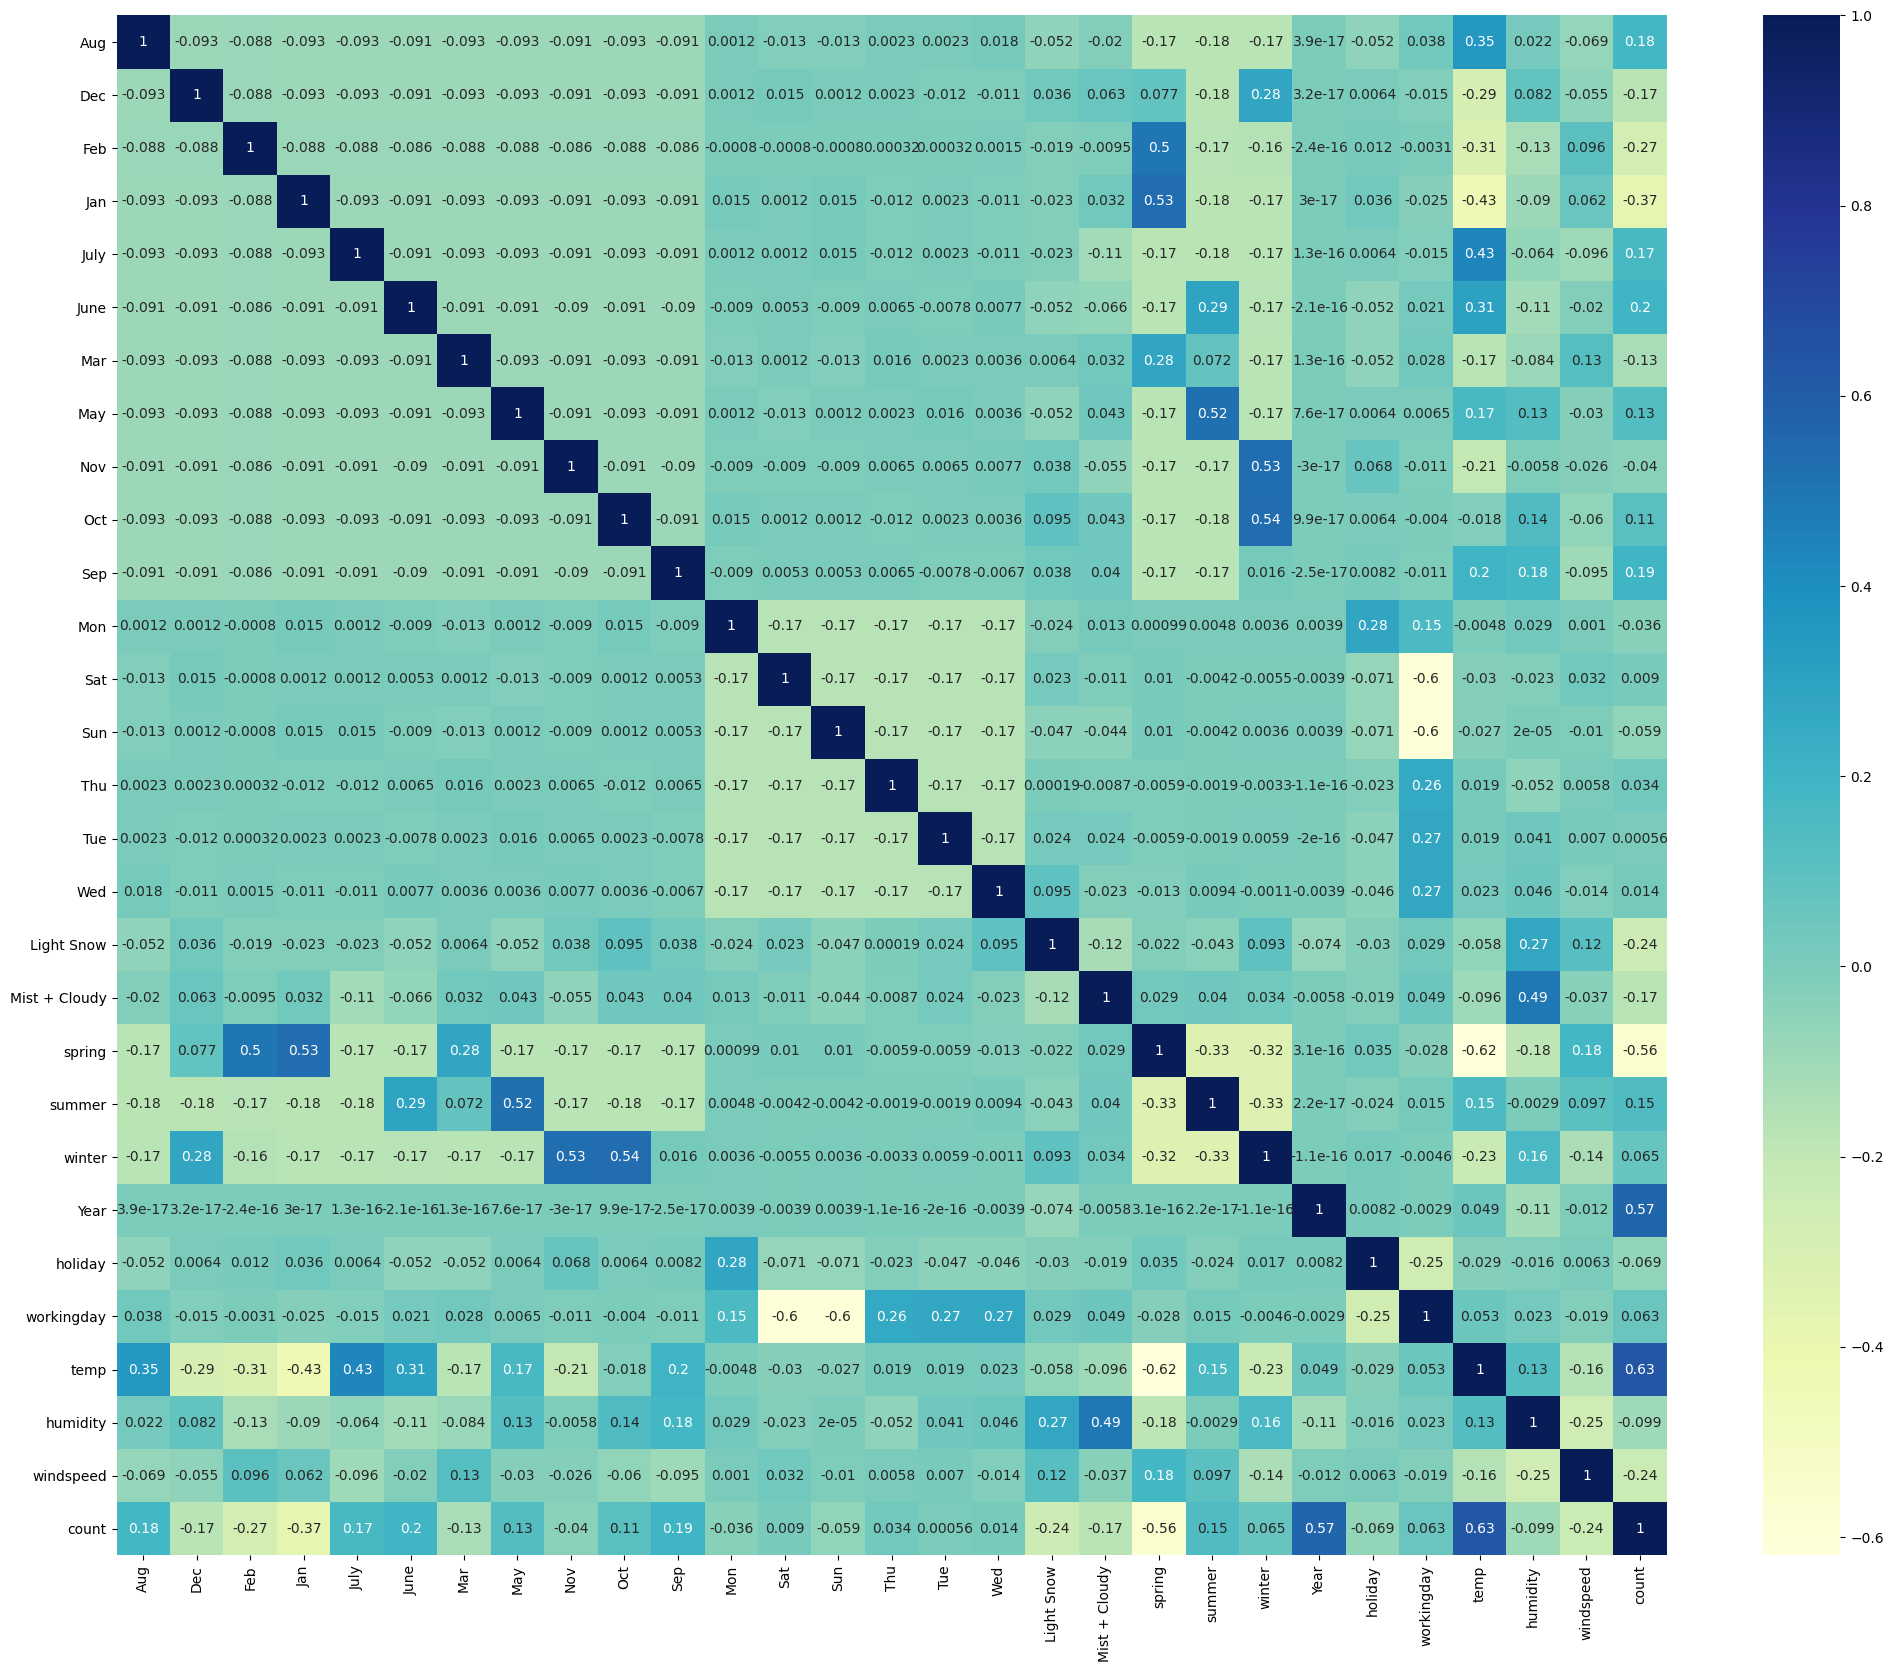

In [18]:
# Now lets check the correlation between variables again
# Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

#### We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

## Splitting the data into Training and Testing Sets

#### Before model building, you first need to perform the test-train split and scale the features.

In [19]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# np.random.seed(30)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [20]:
# Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


## Rescaling the Features

#### It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:
- Min-Max scaling (Normalisation):Between 0 and 1

- Standardisation :mean-0, sigma-1

#### This time, we will use MinMax scaling

In [21]:
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

# Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [23]:
# Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


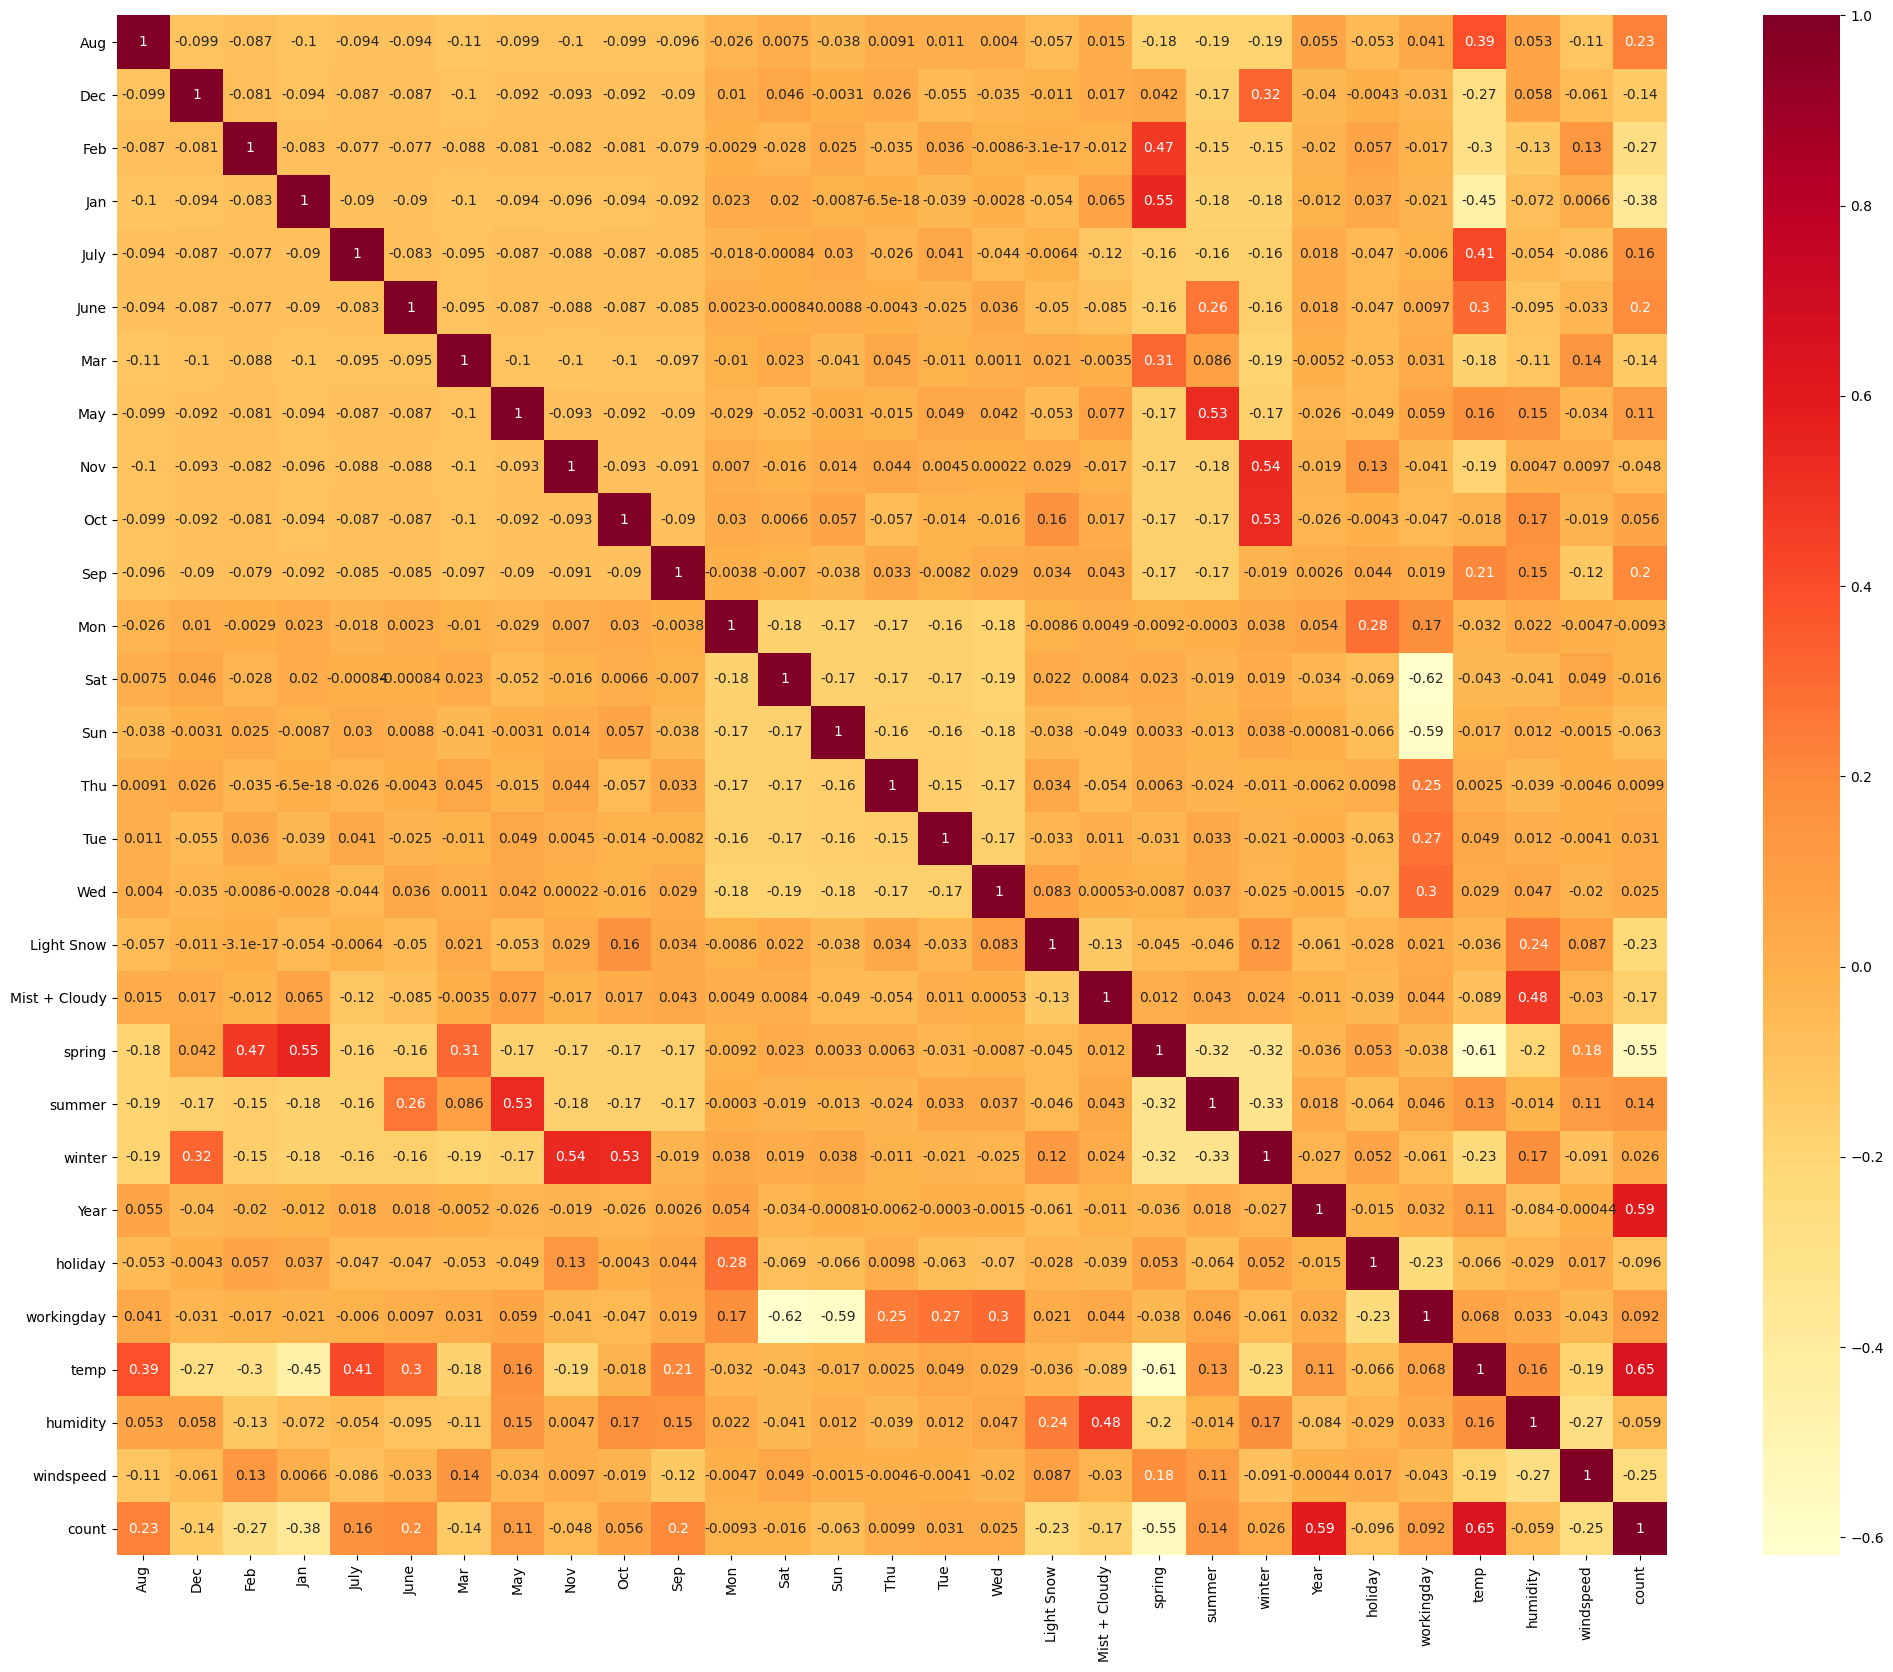

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
# Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

#### From the above heatmap, we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

#### Dividing into X and Y sets for the model building

In [25]:
# Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

## Building a linear model

#### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### Recursive Feature Elimination

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=15)              
rfe = rfe.fit(X_train, y_train)

In [28]:
#List of variables selected
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
27,windspeed,True,1
19,spring,True,1
20,summer,True,1
21,winter,True,1
26,humidity,True,1
12,Sat,True,1
22,Year,True,1
10,Sep,True,1
17,Light Snow,True,1
23,holiday,True,1


In [29]:
# selecting columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [30]:
# Selecting selected feature for model creation
X_train_rfe = X_train[col]

In [31]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [32]:
# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm = sm.OLS(y_train,X_train_lm).fit()

In [33]:
# Print the summary of the regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.22e-191
Time:                        19:42:11   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

## Checking VIF
#### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


#### January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [62]:
# Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

#### Rebuilding the model without 'Jan'


In [63]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm1 = sm.add_constant(X_train_new1)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm1 = sm.OLS(y_train, X_train_lm1).fit()

# Print the summary of the regression model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.11e-191
Time:                        20:05:04   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [37]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,Year,2.08
2,Sat,1.97


#### Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it

In [73]:
# Drop Holiday and also the const variable as we will be creating once again when building the new model
X_train_new2 = X_train_lm1.drop(["holiday", "const"], axis = 1)

#### Rebuilding the model without 'holiday'

In [74]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm2 = sm.add_constant(X_train_new2)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm2 = sm.OLS(y_train,X_train_lm2).fit()

# Print the summary of the regression model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.54e-191
Time:                        20:38:43   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2307      0.036      6.472

In [75]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,28.38
10,temp,16.88
9,workingday,4.72
12,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
4,Mist + Cloudy,2.28
8,Year,2.08
2,Sat,1.84


#### 'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [77]:
# Drop humidity and also the const variable as we will be creating once again when building the new model
X_train_new3=X_train_lm2.drop(["humidity", "const"],axis=1)


#### Rebuilding the model without 'humidity'

In [78]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm3 = sm.add_constant(X_train_new3)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm3 = sm.OLS(y_train,X_train_lm3).fit()

# Print the summary of the regression model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          7.12e-189
Time:                        20:43:01   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [79]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,Mist + Cloudy,1.57


#### From the above P values and VIF, we have the model ready.
- The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.
- A thumb rule commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression.
- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.840 or 84.0%.
- The adjusted R-squared adjusts for the number of terms in the model. We got around 0.836 or 83.6%.
#### The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.

## Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
X_train_lm3

,const,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,windspeed
576,1.0,1,0,0,0,0,0,0,0,1,1,0.815169,0.264686
426,1.0,0,0,1,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,0,0,1,0,1,0,0,1,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,1,0.863973,0.187140
53,1.0,0,0,0,0,0,1,0,0,0,1,0.202618,0.111379
350,1.0,0,0,1,0,1,0,0,1,0,0,0.248216,0.431816
79,1.0,0,0,0,0,1,0,1,0,0,1,0.462664,0.529881


In [84]:
#y train predicted
# Predict the target variable 'y_train' using the trained regression model 'lm3' and the DataFrame 'X_train_lm3'
y_train_pred = lm3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

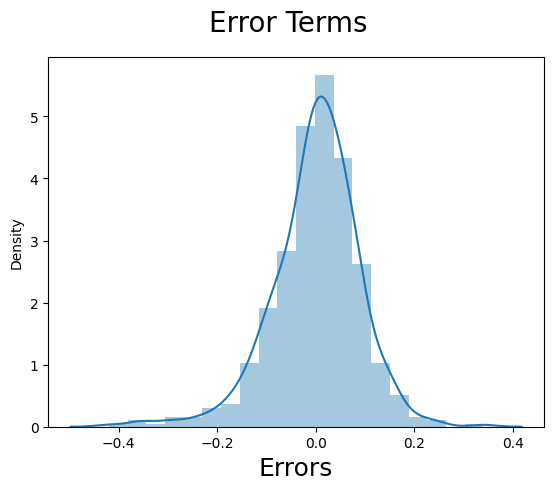

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### We can see Error terms are normally distributed

## Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [86]:
# Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

# Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test

In [87]:
# Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [88]:
# Columns
X_train_new3.columns

Index(['July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [89]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,windspeed
184,1.0,1,0,0,0,1,0,0,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,0,1,0,1,1,0.901354,0.153728
299,1.0,0,0,0,0,1,0,0,1,0,1,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,1,0.881625,0.339570
152,1.0,0,0,0,0,0,0,1,0,0,1,0.817246,0.537414


In [90]:
# Making predictions
y_pred = lm3.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [91]:
# Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.808306664630454

In [92]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.808306664630454)*(11-1)/(11-1-1)
print(Adj_r2)

0.7870074051449488


## Model Evaluation

Text(0, 0.5, 'y_pred')

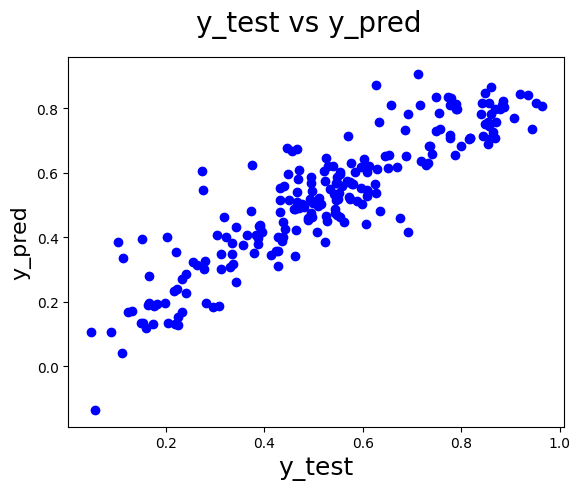

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Visualising the fit on the test set

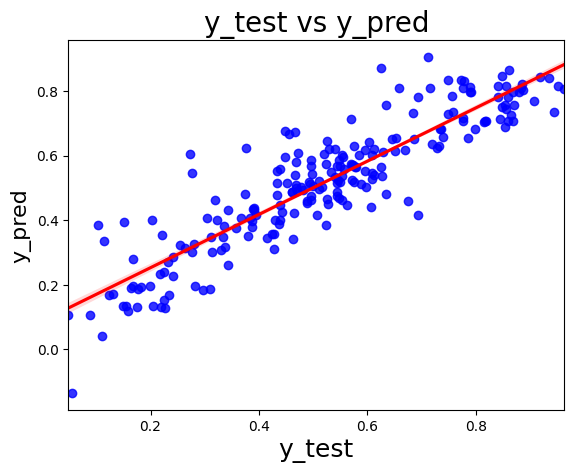

In [95]:
#Regression plot
#plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### We can see that the equation of our best fitted line is:

count=0.492×temp+0.0545×workingday+0.2339×Year+0.0838×winter+0.0481×summer+0.074×Sep+0.0664×Sat-0.0486×July-0.2883×Light Snow-0.0817×(Mist + Cloudy) -0.0664×spring-0.1499×windspeed 

## Final Result Comparison between Train model and Test:

- Train R^2 : 0.840
  
- Train Adjusted R^2 : 0.836
  
- Test R^2: 0.808
  
- Test Adjusted R^2: 0.787
  
- Difference in R^2 between train and test: 3.1%
  
- Difference in adjusted R^2 between Train and test: 4.8% which is less than 5%

#### Yes! Its a best model

## Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that temperature variable is having the highest coefficient 0.492, which means if the temperature increases by one unit the number of bike rentals increases by 0.492 units.
- Similary we can see coefficients of other variables in the equation for best fitted line.
- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

## Business Goals:
- A US bike-sharing provider BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.
- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand
- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather. So, we can give some offers during this season.